In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [3]:
model = torch.load('./model.pt')

In [4]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
# transforms_train = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
# ])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# data_dir = './custom_dataset'
# train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
# test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

# train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
# test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

# print('학습 데이터셋 크기:', len(train_datasets))
# print('테스트 데이터셋 크기:', len(test_datasets))

# class_names = train_datasets.classes
# print(class_names)

In [5]:
class_names = ['강동원', '강민경', '강세련', '강형욱', '강호동', '고소영', '고준희', '공유', '곽도원', '구혜선', '권나라', '권상우', '권정열', '기리보이', '김가영', '김경호', '김고은', '김남길', '김다미', '김민주', '김민희', '김병만', '김새론', '김성균', '김세연', '김소현', '김수현', '김용만', '김우빈', '김유정', '김윤석', '김정현', '김준호', '김지민', '김지원', '김태리', '김태원', '김태희', '김향기', '김현수', '김혜수', '김희선', '김희철', '남규리', '남주혁', '노윤서', '노지선', '더콰이엇', '데프콘', '디노', '로이킴', '류승범', '류준열', '문근영', '문세윤', '문채원', '미연', '민경훈', '민효린', '박규영', '박명수', '박보검', '박보영', '박서준', '박소담', '박수진', '박신혜', '박연경', '박완규', '박중훈', '박지윤', '박해수', '박형식', '배정남', '백예린', '백종원', '버논', '범규', '뷔', '빈지노', '서강준', '서지혜', '설인아', '성시경', '소지섭', '손석구', '손예진', '손태영', '손호준', '송강', '송강호', '송승헌', '송중기', '송하영', '송혜교', '수지', '슈가', '스윙스', '신동엽', '신민아', '신세경', '신아영', '심은경', '심혜진', '아린', '아이유', '안보현', '안성기', '안유진', '안효섭', '양다일', '양세찬', '양세형', '에일리', '연정훈', '연준', '영훈', '예지', '오나라', '오나미', '오달수', '오연서', '원빈', '원우', '원진아', '윈터', '유나', '유상무', '유세윤', '유아인', '유연석', '유재석', '유해진', '윤계상', '윤아', '윤여정', '윤종신', '윤태진', '은지원', '이나영', '이나은', '이도현', '이동욱', '이민기', '이민정', '이민호', '이병헌', '이서진', '이성경', '이수근', '이수혁', '이승철', '이시영', '이영애', '이유비', '이정은', '이정재', '이종석', '이준', '이태란', '이해리', '이향', '이혜리', '이휘재', '임재범', '임지연', '임창정', '임한별', '장기하', '장동건', '장동민', '장범준', '장예원', '장원영', '재현', '전도연', '전지현', '전진', '전현무', '정국', '정우성', '정유미', '정재영', '정준하', '정지훈', '정해인', '정형돈', '제노', '제니', '조보아', '조세호', '조수애', '조슈아', '조여정', '조윤희', '조인성', '조정석', '조진웅', '주지훈', '지민', '지석진', '지수', '진', '진선규', '진지희', '차승원', '차은우', '차태현', '천우희', '최민식', '최우식', '최현욱', '최희', '침착맨', '카리나', '태연', '태현', '하정우', '하지원', '하하', '하현우', '한가인', '한소희', '한예슬', '한지민', '한효주', '허각', '허성태', '현빈', '황광희', '황정민', '휘성']

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
model.eval()
start_time = time.time()

# with torch.no_grad():
#     running_loss = 0.
#     running_corrects = 0

#     for inputs, labels in test_dataloader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
#         loss = criterion(outputs, labels)

#         running_loss += loss.item() * inputs.size(0)
#         running_corrects += torch.sum(preds == labels.data)

#         # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
#         print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        
#     epoch_loss = running_loss / len(test_datasets)
#     epoch_acc = running_corrects / len(test_datasets) * 100.
#     print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [8]:
from PIL import Image
import numpy as np
import glob
import cv2
import os

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [12]:
def get_prediction(image_bytes):
    ff = np.fromfile(image_bytes, np.uint8)
    img = cv2.imdecode(ff,cv2.IMREAD_UNCHANGED) # 한글경로 실행법
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 흑백사진을 확인할 수 있게
    gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)
    if(len(faces) != 0):
        for (x,y,w,h) in faces:
            cropped = img[y - int(h / 4):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]
            if cropped.size != 0:
                image = torch.Tensor(cropped)
                cv2.imwrite('./crop/crop_img.jpg', cropped)
                image = Image.open('./crop/crop_img.jpg')
                image = transforms_test(image).unsqueeze(0).to(device)

                with torch.no_grad():
                    outputs = model(image)
                    _, preds = torch.max(outputs, 1)
                    print(f'[예측 결과 : {class_names[preds[0]]}]')
                    print(preds)
                return class_names[preds[0]]
            else:
                print("얼굴 인식 실패")
    else:
        print("얼굴 인식 실패")

In [17]:
x = get_prediction('./static/images/강동원.jpg')



[예측 결과 : 강동원]
tensor([0], device='cuda:0')


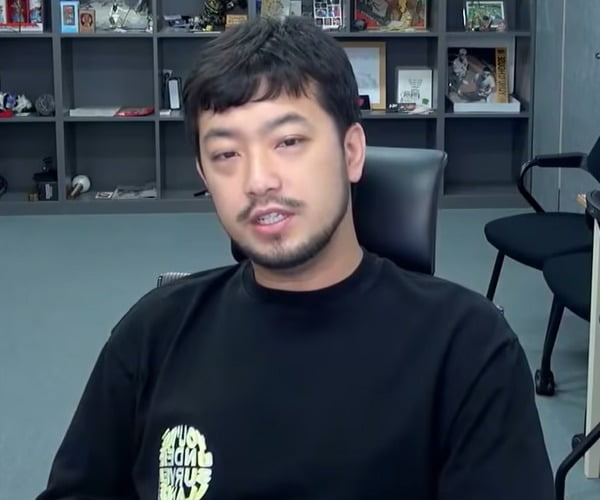

In [19]:
y = Image.open('./test_image.jpg')
y

[[[180 192 210]
  [180 192 210]
  [180 192 210]
  ...
  [178 192 210]
  [178 192 210]
  [178 192 210]]

 [[180 192 210]
  [180 192 210]
  [180 192 210]
  ...
  [178 192 210]
  [178 192 210]
  [178 192 210]]

 [[180 192 210]
  [180 192 210]
  [180 192 210]
  ...
  [179 193 211]
  [179 193 211]
  [179 193 211]]

 ...

 [[211 216 215]
  [211 216 215]
  [211 216 215]
  ...
  [176 148 117]
  [176 148 117]
  [176 148 117]]

 [[211 216 215]
  [211 216 215]
  [211 216 215]
  ...
  [176 148 117]
  [176 148 117]
  [176 148 117]]

 [[211 216 215]
  [211 216 215]
  [211 216 215]
  ...
  [176 148 117]
  [176 148 117]
  [176 148 117]]]
